In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import scipy

In [10]:
data = pd.read_csv("../datasets/modified_c4_epa_air_quality.csv")
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [11]:
data.shape

(260, 8)

<Axes: >

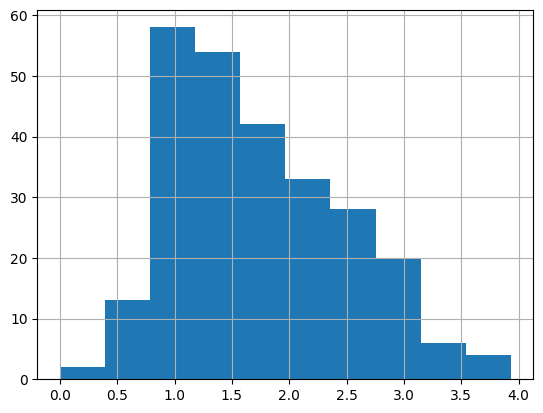

In [12]:
data["aqi_log"].hist()

In [16]:
mean_aqi_log = np.mean(data["aqi_log"])
std_aqi_log = np.std(data["aqi_log"])

In [25]:
lower_limit_aqi_log = mean_aqi_log - 1*std_aqi_log
upper_limit_aqi_log = mean_aqi_log + 1*std_aqi_log

print(((data["aqi_log"] >= lower_limit_aqi_log) & (data["aqi_log"] <= upper_limit_aqi_log)).mean())

lower_limit_aqi_log = mean_aqi_log - 2*std_aqi_log
upper_limit_aqi_log = mean_aqi_log + 2*std_aqi_log

print(((data["aqi_log"] >= lower_limit_aqi_log) & (data["aqi_log"] <= upper_limit_aqi_log)).mean())
lower_limit_aqi_log = mean_aqi_log - 3*std_aqi_log
upper_limit_aqi_log = mean_aqi_log + 3*std_aqi_log

print(((data["aqi_log"] >= lower_limit_aqi_log) & (data["aqi_log"] <= upper_limit_aqi_log)).mean())


0.7615384615384615
0.9576923076923077
0.9961538461538462


In [27]:
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [29]:
#outliers
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044
